In [2]:
import h5py
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import ast
%matplotlib notebook

## load a single behavior file

<IPython.core.display.Javascript object>


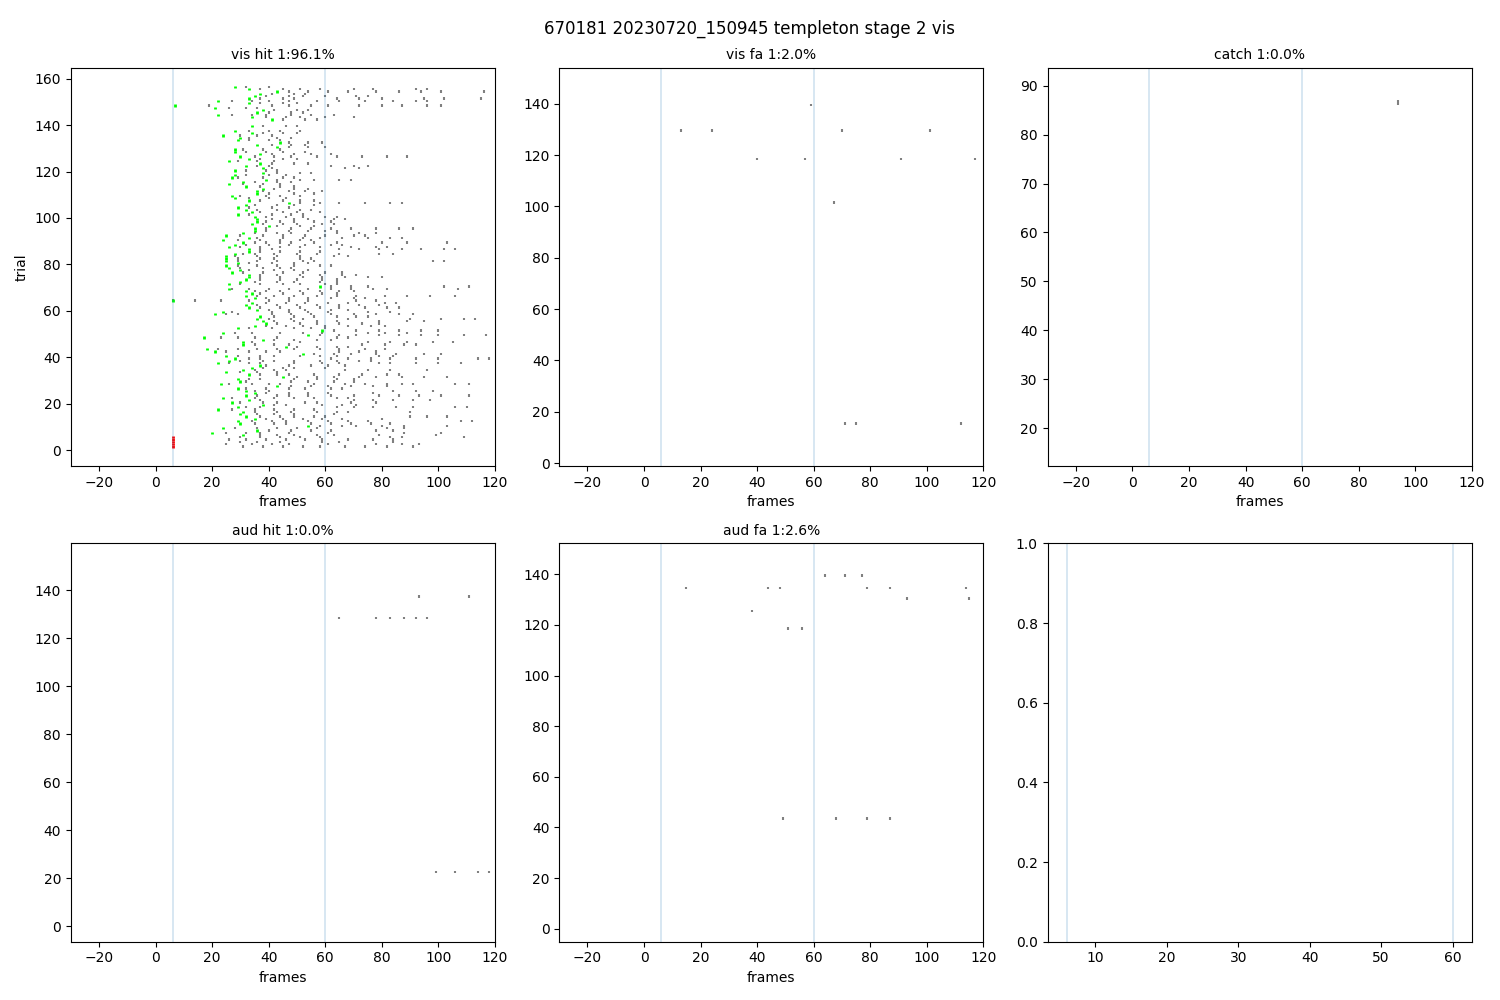

In [12]:
#paste path to behavior file here
path=r"D:\DynamicRoutingTask\Data\670181\DynamicRouting1_670181_20230720_150945.hdf5"
f = h5py.File(path, "r")

#plot licks per trial, separated by block, go/nogo, and vis/aud

trialPreStimFrames=f['trialPreStimFrames'][:]
preStimFramesFixed=f['preStimFramesFixed'][()]
trialStimStartFrame=f['trialStimStartFrame'][:]
trialEndFrame=f['trialEndFrame'][:]
trialStimID=f['trialStim'][:].astype('str')
lickFrames=f['lickFrames'][:]
rewardFrames=f['rewardFrames'][:]
trialAutoRewarded=f['trialAutoRewarded'][:]
responseWindow=f['responseWindow'][:]
manualRewardFrames=f['manualRewardFrames'][:]
trialResponseFrame=f['trialResponseFrame'][:]
quiescentViolationFrames=f['quiescentViolationFrames'][:]
blockStim=f['blockStim'][:].astype('str')
trialBlock=f['trialBlock'][:]
blockStimRewarded=f['blockStimRewarded'][:].astype('str')
rigName=f['rigName'][()]

subjectName=f['subjectName'][()].decode()
startTime=f['startTime'][()].decode()
taskVersion=f['taskVersion'][()].decode()

if 'trialOptoVoltage' in list(f.keys()):
    trialOptoVoltage=f['trialOptoVoltage'][:]
else:
    trialOptoVoltage = []

if type(blockStim)==str:
    blockStim=ast.literal_eval(blockStim)

for xx in range(0,len(blockStim)):
    if type(blockStim[xx])==str:
        blockStim[xx]=ast.literal_eval(blockStim[xx])
    
unique_blocks=np.unique(trialBlock)

fig,ax=plt.subplots(2,3,figsize=(15,10))
ax=ax.flatten()
for aa in range(0,len(ax)):
    ax[aa].axvline(responseWindow[0],linewidth=0.25)
    ax[aa].axvline(responseWindow[1],linewidth=0.25)

    
lickFrames=lickFrames[np.where(np.diff(lickFrames)>1)[0]]

#specify vis go/nogo, aud go/nogo
vis_go_trials=[]
vis_nogo_trials=[]
vis_hit_trials=[]
vis_false_alarm_trials=[]
vis_miss_trials=[]
vis_correct_reject_trials=[]
vis_autoreward_trials=[]
vis_manualreward_trials=[]

aud_go_trials=[]
aud_nogo_trials=[]
aud_hit_trials=[]
aud_false_alarm_trials=[]
aud_miss_trials=[]
aud_correct_reject_trials=[]
aud_autoreward_trials=[]
aud_manualreward_trials=[]

catch_trials=[]
catch_resp_trials=[]

vis_hit_title='vis hit'
vis_fa_title='vis fa'
aud_hit_title='aud hit'
aud_fa_title='aud fa'
catch_title='catch'

block=[]
stim_rewarded=[]
start_time=[]

vis_go_count=0
vis_go_non_auto_reward=0
vis_nogo_count=0
vis_hit_count=0
vis_fa_count=0

aud_go_count=0
aud_go_non_auto_reward=0
aud_nogo_count=0
aud_hit_count=0
aud_fa_count=0

catch_count=0
catch_resp_count=0

for bb in range(0,len(unique_blocks)):
    
    blockTrialStart=np.where(trialBlock==unique_blocks[bb])[0][0]
    blockTrialEnd=np.where(trialBlock==unique_blocks[bb])[0][-1]+1
    
    for tt in range(blockTrialStart,blockTrialEnd):
        if (tt>=len(trialEndFrame)):
            break
        temp_start_frame=trialStimStartFrame[tt]-250#preStimFramesFixed
        temp_end_frame=trialEndFrame[tt]

        temp_licks=[]
        temp_reward=[]
        temp_manual_reward=[]
        temp_quiescent_viol=[]
        
        temp_ax=[]
        temp_count=[]
        reward_color='y'
        
        if len(lickFrames)>0:
            temp_licks=np.copy(lickFrames)
            temp_licks=temp_licks[(temp_licks>temp_start_frame)&(temp_licks<temp_end_frame)]-trialStimStartFrame[tt]

        if len(rewardFrames)>0:
            temp_reward=np.copy(rewardFrames)
            temp_reward=temp_reward[(temp_reward>temp_start_frame)&(temp_reward<temp_end_frame)]-trialStimStartFrame[tt]

        if len(manualRewardFrames)>0:
            temp_manual_reward=np.copy(manualRewardFrames)
            temp_manual_reward=temp_manual_reward[(temp_manual_reward>temp_start_frame)&
                                                  (temp_manual_reward<temp_end_frame)]-trialStimStartFrame[tt]
        if len(quiescentViolationFrames)>0:
            temp_quiescent_viol=np.copy(quiescentViolationFrames)
            temp_quiescent_viol=temp_quiescent_viol[(temp_quiescent_viol>temp_start_frame)&
                                                  (temp_quiescent_viol<temp_end_frame)]-trialStimStartFrame[tt]
        
        temp_RW_lick=0
        for ii in temp_licks:
            if (ii>=responseWindow[0])&(ii<=responseWindow[1]):
                temp_RW_lick=1

        #visual-go block
        if 'vis' in blockStimRewarded[bb]:
            if (trialStimID[tt] == 'vis1'):
                vis_go_count+=1
                temp_ax=0
                temp_count=vis_go_count
                if ~trialAutoRewarded[tt]:
                    vis_go_non_auto_reward+=1
                    reward_color=[0,1,0]
                    if temp_RW_lick:
                        vis_hit_count+=1
                else:
                    reward_color=[1,0,0]
                
            elif (trialStimID[tt] == 'vis2'):
                vis_nogo_count+=1
                temp_ax=1
                temp_count=vis_nogo_count
                if temp_RW_lick:
                    vis_fa_count+=1
                    
            elif trialStimID[tt] == 'catch':
                catch_count+=1
                temp_ax=2
                temp_count=catch_count
                if temp_RW_lick:
                    catch_resp_count+=1

            elif ('sound1' in trialStimID[tt]):
                aud_go_count+=1
                temp_ax=3
                temp_count=aud_go_count
                if ~trialAutoRewarded[tt]:
                    aud_go_non_auto_reward+=1
                    if temp_RW_lick:
                        aud_hit_count+=1
                        
            elif ('sound2' in trialStimID[tt]):
                aud_nogo_count+=1
                temp_ax=4
                temp_count=aud_nogo_count              
                if temp_RW_lick:
                    aud_fa_count+=1


        #sound-go block
        elif 'sound' in blockStimRewarded[bb]:
            if (trialStimID[tt] == 'sound1'):
                aud_go_count+=1
                temp_ax=3
                temp_count=aud_go_count
                if ~trialAutoRewarded[tt]:
                    aud_go_non_auto_reward+=1
                    reward_color=[0,1,0]
                    if temp_RW_lick:
                        aud_hit_count+=1
                else:
                    reward_color=[1,0,0]
                ax[3].vlines(temp_manual_reward,ymin=aud_go_count,ymax=aud_go_count+1,color=[0,0,1],linewidth=2)
                        
            elif (trialStimID[tt] == 'sound2'):
                aud_nogo_count+=1
                temp_ax=4
                temp_count=aud_nogo_count
                if temp_RW_lick:
                    aud_fa_count+=1
            
            elif trialStimID[tt] == 'catch':
                catch_count+=1
                temp_ax=2
                temp_count=catch_count
                if temp_RW_lick:
                    catch_resp_count+=1

            elif ('vis1' in trialStimID[tt]):
                vis_go_count+=1
                temp_ax=0
                temp_count=vis_go_count
                if ~trialAutoRewarded[tt]:
                    vis_go_non_auto_reward+=1
                    if temp_RW_lick:
                        vis_hit_count+=1
                        
            elif ('vis2' in trialStimID[tt]):
                vis_nogo_count+=1
                temp_ax=1
                temp_count=vis_nogo_count
                if temp_RW_lick:
                    vis_fa_count+=1
        
        if (len(trialOptoVoltage)>0):
            if ~np.isnan(trialOptoVoltage[tt]):
                #ax[temp_ax].axhline(temp_count+0.5,color='b')
                temp_patch=patches.Rectangle([0,temp_count],60,1,
                                        color=[0.2,0.2,0.8],alpha=0.15)
                ax[temp_ax].add_patch(temp_patch)
                
        ax[temp_ax].vlines(temp_licks,ymin=temp_count,ymax=temp_count+1,color='grey')
        ax[temp_ax].vlines(temp_reward,ymin=temp_count,ymax=temp_count+1,color=reward_color,linewidth=2)
        ax[temp_ax].vlines(temp_manual_reward,ymin=temp_count,ymax=temp_count+1,color=[0,0,1],linewidth=2)
        
        ax[temp_ax].plot(temp_quiescent_viol,np.ones(len(temp_quiescent_viol))*temp_count+0.5,'m*')
    
        ax[temp_ax].set_xlim([-30,120])
        
        if ('vis1' in blockStim[bb])&('sound1' in blockStim[bb]):
            if aud_go_non_auto_reward==0:
                aud_go_non_auto_reward=1
            if vis_go_non_auto_reward==0:
                vis_go_non_auto_reward=1
        
    if bb<len(unique_blocks)-1:
        ax[0].axhline(vis_go_count+1,color='k',linestyle='--')
        ax[1].axhline(vis_nogo_count+1,color='k',linestyle='--')
        ax[2].axhline(catch_count+1,color='k',linestyle='--')
        ax[3].axhline(aud_go_count+1,color='k',linestyle='--')
        ax[4].axhline(aud_nogo_count+1,color='k',linestyle='--')

    vis_go_trials.append(vis_go_non_auto_reward-np.sum(vis_go_trials))
    vis_nogo_trials.append(vis_nogo_count-np.sum(vis_nogo_trials))
    vis_hit_trials.append(vis_hit_count-np.sum(vis_hit_trials))
    vis_false_alarm_trials.append(vis_fa_count-np.sum(vis_false_alarm_trials))
    vis_miss_trials.append((vis_go_non_auto_reward-vis_hit_count)-np.sum(vis_miss_trials))
    vis_correct_reject_trials.append((vis_nogo_count-vis_fa_count)-np.sum(vis_correct_reject_trials))
    vis_autoreward_trials.append((vis_go_count-vis_go_non_auto_reward)-np.sum(vis_autoreward_trials))
    
    aud_go_trials.append(aud_go_non_auto_reward-np.sum(aud_go_trials))
    aud_nogo_trials.append(aud_nogo_count-np.sum(aud_nogo_trials))
    aud_hit_trials.append(aud_hit_count-np.sum(aud_hit_trials))
    aud_false_alarm_trials.append(aud_fa_count-np.sum(aud_false_alarm_trials))
    aud_miss_trials.append((aud_go_non_auto_reward-aud_hit_count)-np.sum(aud_miss_trials))
    aud_correct_reject_trials.append((aud_nogo_count-aud_fa_count)-np.sum(aud_correct_reject_trials))
    aud_autoreward_trials.append((aud_go_count-aud_go_non_auto_reward)-np.sum(aud_autoreward_trials))
    
    catch_trials.append(catch_count-np.sum(catch_trials))
    catch_resp_trials.append(catch_resp_count-np.sum(catch_resp_trials))

    block.append(bb)
    stim_rewarded.append(blockStimRewarded[bb])
    start_time.append(startTime)
    
    ###make block titles more generalized like this
    temp_vis_hit_title=(' '+str(bb+1)+':{tempvishit:.1f}%'.format(
        tempvishit=(vis_hit_trials[bb]/vis_go_trials[bb])*100))
    vis_hit_title=vis_hit_title+temp_vis_hit_title
    
    temp_vis_fa_title=(' '+str(bb+1)+':{tempvisfa:.1f}%'.format(
        tempvisfa=(vis_false_alarm_trials[bb]/vis_nogo_trials[bb])*100))
    vis_fa_title=vis_fa_title+temp_vis_fa_title
    
    temp_catch_title=(' '+str(bb+1)+':{tempcatch:.1f}%'.format(
        tempcatch=(catch_resp_trials[bb]/catch_trials[bb])*100))
    catch_title=catch_title+temp_catch_title
    
    temp_aud_hit_title=(' '+str(bb+1)+':{tempaudhit:.1f}%'.format(
        tempaudhit=(aud_hit_trials[bb]/aud_go_trials[bb])*100))
    aud_hit_title=aud_hit_title+temp_aud_hit_title
    
    temp_aud_fa_title=(' '+str(bb+1)+':{tempaudfa:.1f}%'.format(
        tempaudfa=(aud_false_alarm_trials[bb]/aud_nogo_trials[bb])*100))
    aud_fa_title=aud_fa_title+temp_aud_fa_title
    

ax[0].set_title(vis_hit_title,fontsize=10)
ax[0].set_ylabel('trial')
ax[0].set_xlabel('frames')

ax[1].set_title(vis_fa_title,fontsize=10)
ax[1].set_xlabel('frames')

ax[2].set_title(catch_title,fontsize=10)
ax[2].set_xlabel('frames')

ax[3].set_title(aud_hit_title,fontsize=10)
ax[3].set_xlabel('frames')

ax[4].set_title(aud_fa_title,fontsize=10)
ax[4].set_xlabel('frames')

fig.suptitle(subjectName+' '+startTime+' '+taskVersion)

fig.tight_layout()

f.close()

## plot learning curve

<IPython.core.display.Javascript object>


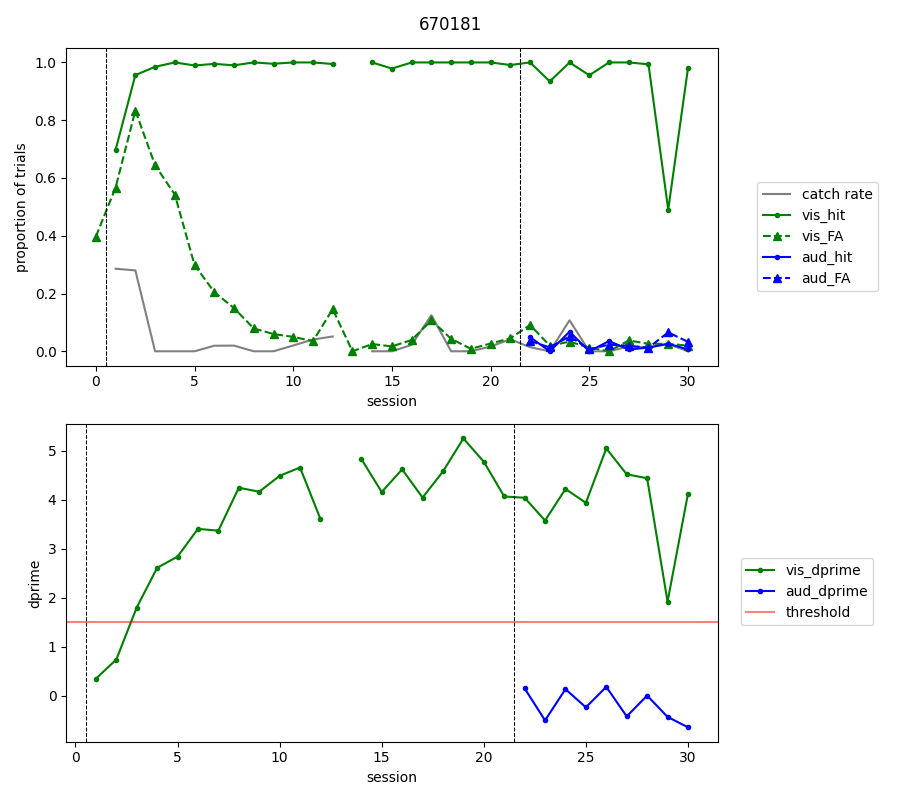

In [13]:
#enter path to mouse data
path=r"D:\DynamicRoutingTask\Data\670181"

#set dprime threshold
dprime_threshold=1.5

#function to adjust hit/fa rates if they equal 0 or 1
def adjust_rate_response(r,n):
    if r == 0:
        r = 0.5/n
    elif r == 1:
        r = 1 - 0.5/n
    return r

filenames = [f for f in os.listdir(path) if (os.path.isfile(os.path.join(path, f)))&('DynamicRouting1' in f)]

aud_session=[]
vis_session=[]

#redo loop, specify vis go/nogo, aud go/nogo
vis_go_trials=[]
vis_nogo_trials=[]
vis_hit_trials=[]
vis_false_alarm_trials=[]
vis_miss_trials=[]
vis_correct_reject_trials=[]
vis_hit_rate=[]
vis_fa_rate=[]
vis_dprime=[]

aud_go_trials=[]
aud_nogo_trials=[]
aud_hit_trials=[]
aud_false_alarm_trials=[]
aud_miss_trials=[]
aud_correct_reject_trials=[]
aud_hit_rate=[]
aud_fa_rate=[]
aud_dprime=[]

catch_trials=[]
catch_resp_trials=[]

autoreward_trials=[]
manualreward_trials=[]

start_time=[]
task_version=[]
subject_name=[]

for ii,ff in enumerate(filenames):
    f = h5py.File(os.path.join(path,ff), "r")
    
    if 'trialPreStimFrames' not in list(f.keys()):
        continue
    trialPreStimFrames=f['trialPreStimFrames'][:]
    preStimFramesFixed=f['preStimFramesFixed'][()]
    trialStimStartFrame=f['trialStimStartFrame'][:]
    trialEndFrame=f['trialEndFrame'][:]
    trialStimID=f['trialStim'][:].astype('str')
    lickFrames=f['lickFrames'][:]
    rewardFrames=f['rewardFrames'][:]
    trialAutoRewarded=f['trialAutoRewarded'][:]
    responseWindow=f['responseWindow'][:]
    manualRewardFrames=f['manualRewardFrames'][:]
    trialResponseFrame=f['trialResponseFrame'][:]
    trialRepeat=f['trialRepeat'][:]
    blockStimRewarded=f['blockStimRewarded'][:].astype('str')
    if type(f['blockStim'][:][0])==bytes:
        blockStim=f['blockStim'][:][0].decode()
    else:
        blockStim=f['blockStim'][:][0].astype('str')
    
    if type(blockStim)==str:
        blockStim=ast.literal_eval(blockStim)
    
    if 'taskVersion' in f:
        taskVersion=f['taskVersion'][()].decode()
    else:
        taskVersion=''
    subjectName=f['subjectName'][()].decode()
    startTime=f['startTime'][()].decode()
    
    if 'vis' in trialStimID[0]:
        vis_session.append(1)
        aud_session.append(0)
    elif 'sound' in trialStimID[0]:
        vis_session.append(0)
        aud_session.append(1)
    else:
        vis_session.append(0)
        aud_session.append(0)
    
    vis_go_count=0
    vis_go_non_auto_reward=0
    vis_nogo_count=0
    vis_hit_count=0
    vis_fa_count=0
    
    aud_go_count=0
    aud_go_non_auto_reward=0
    aud_nogo_count=0
    aud_hit_count=0
    aud_fa_count=0
    
    catch_count=0
    catch_resp_count=0

    
    for tt in range(0,len(trialEndFrame)):
        if trialRepeat[tt]==True:
            continue
        temp_start_frame=trialStimStartFrame[tt]-250#preStimFramesFixed
        temp_end_frame=trialEndFrame[tt]

        temp_licks=[]
        temp_reward=[]
        temp_manual_reward=[]
        temp_quiescent_viol=[]

        if len(lickFrames)>0:
            temp_licks=np.copy(lickFrames)
            temp_licks=temp_licks[(temp_licks>temp_start_frame)&(temp_licks<temp_end_frame)]-trialStimStartFrame[tt]

        if len(rewardFrames)>0:
            temp_reward=np.copy(rewardFrames)
            temp_reward=temp_reward[(temp_reward>temp_start_frame)&(temp_reward<temp_end_frame)]-trialStimStartFrame[tt]

        if len(manualRewardFrames)>0:
            temp_manual_reward=np.copy(manualRewardFrames)
            temp_manual_reward=temp_manual_reward[(temp_manual_reward>temp_start_frame)&
                                                  (temp_manual_reward<temp_end_frame)]-trialStimStartFrame[tt]

        temp_RW_lick=0
        for ll in temp_licks:
            if (ll>=responseWindow[0])&(ll<=responseWindow[1]):
                temp_RW_lick=1
        
        #visual-go block
        if 'vis' in blockStimRewarded[0]:
            if (trialStimID[tt] == blockStim[0]):
                vis_go_count+=1
                if ~trialAutoRewarded[tt]:
                    vis_go_non_auto_reward+=1
                    if temp_RW_lick:
                        vis_hit_count+=1
            elif (trialStimID[tt] == blockStim[1]):
                vis_nogo_count+=1
                if temp_RW_lick:
                    vis_fa_count+=1
            elif trialStimID[tt] == 'catch':
                catch_count+=1
                if temp_RW_lick:
                    catch_resp_count+=1
            
            elif ('sound1' in trialStimID[tt]):
                aud_go_count+=1
                if ~trialAutoRewarded[tt]:
                    aud_go_non_auto_reward+=1
                    if temp_RW_lick:
                        aud_hit_count+=1
            elif ('sound2' in trialStimID[tt]):
                aud_nogo_count+=1
                if temp_RW_lick:
                    aud_fa_count+=1
                    
        
        #sound-go block
        elif 'sound' in blockStimRewarded[0]:
            if (trialStimID[tt] == blockStim[0]):
                aud_go_count+=1
                if ~trialAutoRewarded[tt]:
                    aud_go_non_auto_reward+=1
                    if temp_RW_lick:
                        aud_hit_count+=1
            elif (trialStimID[tt] == blockStim[1]):
                aud_nogo_count+=1
                if temp_RW_lick:
                    aud_fa_count+=1
            elif trialStimID[tt] == 'catch':
                catch_count+=1
                if temp_RW_lick:
                    catch_resp_count+=1
            
            elif ('vis1' in trialStimID[tt]):
                vis_go_count+=1
                if ~trialAutoRewarded[tt]:
                    vis_go_non_auto_reward+=1
                    if temp_RW_lick:
                        vis_hit_count+=1
            elif ('vis2' in trialStimID[tt]):
                vis_nogo_count+=1
                if temp_RW_lick:
                    vis_fa_count+=1
    
    if ('vis1' in blockStim)&('sound1' in blockStim):
        if aud_go_non_auto_reward==0:
            aud_go_non_auto_reward=1
        if vis_go_non_auto_reward==0:
            vis_go_non_auto_reward=1
            
    vis_go_trials.append(vis_go_non_auto_reward)
    vis_nogo_trials.append(vis_nogo_count)
    vis_hit_trials.append(vis_hit_count)
    vis_false_alarm_trials.append(vis_fa_count)
    vis_miss_trials.append(vis_go_non_auto_reward-vis_hit_count)
    vis_correct_reject_trials.append(vis_nogo_count-vis_fa_count)
    
    if vis_go_trials[-1]>0 and vis_nogo_trials[-1]>0:
        v_hit_rate=vis_hit_trials[-1]/vis_go_trials[-1]
        v_hit_rate_adj=adjust_rate_response(v_hit_rate,vis_go_trials[-1])
        vis_hit_rate.append(v_hit_rate)
        v_fa_rate=vis_false_alarm_trials[-1]/vis_nogo_trials[-1]
        v_fa_rate_adj=adjust_rate_response(v_fa_rate,vis_nogo_trials[-1])
        vis_fa_rate.append(v_fa_rate)
        v_dprime=(st.norm.ppf(v_hit_rate_adj) - st.norm.ppf(v_fa_rate_adj))
        vis_dprime.append(v_dprime)
    else:
        vis_hit_rate.append(np.nan)
        vis_fa_rate.append(np.nan)
        vis_dprime.append(np.nan)
            
    aud_go_trials.append(aud_go_non_auto_reward)
    aud_nogo_trials.append(aud_nogo_count)
    aud_hit_trials.append(aud_hit_count)
    aud_false_alarm_trials.append(aud_fa_count)
    aud_miss_trials.append(aud_go_non_auto_reward-aud_hit_count)
    aud_correct_reject_trials.append(aud_nogo_count-aud_fa_count)
    
    if aud_go_trials[-1]>0 and aud_nogo_trials[-1]>0:
        a_hit_rate=aud_hit_trials[-1]/aud_go_trials[-1]
        a_hit_rate_adj=adjust_rate_response(a_hit_rate,aud_go_trials[-1])
        aud_hit_rate.append(a_hit_rate)
        a_fa_rate=aud_false_alarm_trials[-1]/aud_nogo_trials[-1]
        a_fa_rate_adj=adjust_rate_response(a_fa_rate,aud_nogo_trials[-1])
        aud_fa_rate.append(a_fa_rate)
        a_dprime=(st.norm.ppf(a_hit_rate_adj) - st.norm.ppf(a_fa_rate_adj))
        aud_dprime.append(a_dprime)
    else:
        aud_hit_rate.append(np.nan)
        aud_fa_rate.append(np.nan)
        aud_dprime.append(np.nan)
        
    catch_trials.append(catch_count)
    catch_resp_trials.append(catch_resp_count)
    
    start_time.append(startTime)
    task_version.append(taskVersion)
    subject_name.append(subjectName)
    
learning_curve_df={
    'vis_go_trials':vis_go_trials,
    'vis_nogo_trials':vis_nogo_trials,
    'vis_hit_trials':vis_hit_trials,
    'vis_false_alarm_trials':vis_false_alarm_trials,
    'vis_miss_trials':vis_miss_trials,
    'vis_correct_reject_trials':vis_correct_reject_trials,
    'vis_hit_rate':vis_hit_rate,
    'vis_fa_rate':vis_fa_rate,
    'vis_dprime':vis_dprime,
    
    'aud_go_trials':aud_go_trials,
    'aud_nogo_trials':aud_nogo_trials,
    'aud_hit_trials':aud_hit_trials,
    'aud_false_alarm_trials':aud_false_alarm_trials,
    'aud_miss_trials':aud_miss_trials,
    'aud_correct_reject_trials':aud_correct_reject_trials,
    'aud_hit_rate':aud_hit_rate,
    'aud_fa_rate':aud_fa_rate,
    'aud_dprime':aud_dprime,
    
    'catch_trials':catch_trials,
    'catch_resp_trials':catch_resp_trials,

    'vis_session':vis_session,
    'aud_session':aud_session,
    
    'start_time':start_time,
    'task_version':task_version,
    'subject_name':subject_name
}
    
learning_curve_df=pd.DataFrame.from_dict(learning_curve_df)


## plotting

#vis hit rate, FA rate - green
#aud hit rate, FA rate - blue

task_version_switch=np.where(learning_curve_df['task_version'][1:].values!=
                             learning_curve_df['task_version'][:-1].values)[0]

fig,ax=plt.subplots(2,1,figsize=(9,8))

#plot raw response rates
ax[0].plot(learning_curve_df['catch_resp_trials']/learning_curve_df['catch_trials'],'grey')
ax[0].plot(learning_curve_df['vis_hit_trials']/learning_curve_df['vis_go_trials'],'g.-')
ax[0].plot(learning_curve_df['vis_false_alarm_trials']/learning_curve_df['vis_nogo_trials'],'g^--')
ax[0].plot(learning_curve_df['aud_hit_trials']/learning_curve_df['aud_go_trials'],'b.-')
ax[0].plot(learning_curve_df['aud_false_alarm_trials']/learning_curve_df['aud_nogo_trials'],'b^--')
for xx in task_version_switch:
    ax[0].axvline(xx+0.5,color='k',linestyle='--',linewidth=0.75)
ax[0].legend(['catch rate','vis_hit','vis_FA','aud_hit','aud_FA'],bbox_to_anchor = (1.05, 0.6))
ax[0].set_ylabel('proportion of trials')
ax[0].set_xlabel('session')
for xx in task_version_switch:
    ax[0].axvline(xx+0.5,color='k',linestyle='--',linewidth=0.75)

#plot dprime
ax[1].plot(learning_curve_df['vis_dprime'],'g.-')
ax[1].plot(learning_curve_df['aud_dprime'],'b.-')
ax[1].axhline(dprime_threshold,color='r',alpha=0.5)
for xx in task_version_switch:
    ax[1].axvline(xx+0.5,color='k',linestyle='--',linewidth=0.75)
ax[1].set_ylabel('dprime')
ax[1].set_xlabel('session')
ax[1].legend(['vis_dprime','aud_dprime','threshold'],bbox_to_anchor = (1.25, 0.6))


fig.suptitle(subjectName)

fig.tight_layout()

